<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Neural Network - MLPClassifier - Body Performance
</b></font> </br></p> 

---


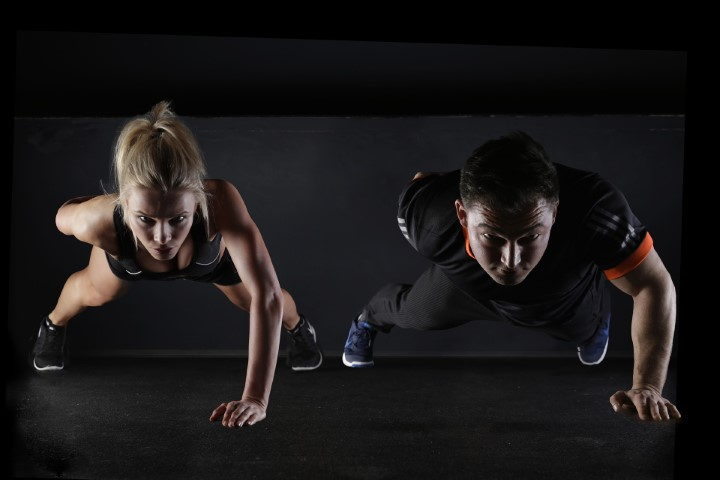

Bild von <a href="https://pixabay.com/de/users/5132824-5132824/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2264825">5132824</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2264825">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>


Daten, die von der National Sports Promotion Foundation zum Gedenken an die Olympischen Spiele in Seoul verwaltet werden. Die Daten beinhatlten den Leistungsgrad, Altersgruppe, Größe, Gewicht, Sit-up, BMI und Weitsprung an Ort und Stelle, etc.  


[DataSet](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)   
[Info](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)   
[Quelle](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1)



In [1]:
import pandas as pd
df = pd.read_csv('/content/BodyPerformance.csv')

In [2]:
label = 'class'
features = [n for n in df.columns if n != label]

In [3]:
target = df[label].copy()
data = df[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [12]:
target.value_counts()

C    3349
D    3349
A    3348
B    3347
Name: class, dtype: int64

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [4]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>


In [5]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder                          
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])                          

<p><font color='black' size="5">
Skalierung
</font></p>

In [6]:
from sklearn.preprocessing import StandardScaler
data[num_col] = StandardScaler().fit_transform(data[num_col])

<p><font color='black' size="5">
Missing Values
</font></p>

In [ ]:
data.isnull().sum()

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42, stratify=target)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((9375, 11), (4018, 11), (9375,), (4018,))

In [11]:
target_train.value_counts()

C    2344
D    2344
A    2344
B    2343
Name: class, dtype: int64

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [13]:
from sklearn import set_config
set_config(display='diagram')

In [15]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(verbose=1, max_iter=300, learning_rate='adaptive', random_state=42)
model.fit(data_train, target_train)

Iteration 1, loss = 1.24195650
Iteration 2, loss = 1.03813064
Iteration 3, loss = 0.95322226
Iteration 4, loss = 0.90644793
Iteration 5, loss = 0.88079704
Iteration 6, loss = 0.86371776
Iteration 7, loss = 0.85043003
Iteration 8, loss = 0.84075115
Iteration 9, loss = 0.83195732
Iteration 10, loss = 0.82524188
Iteration 11, loss = 0.81702518
Iteration 12, loss = 0.81009607
Iteration 13, loss = 0.80420661
Iteration 14, loss = 0.79592285
Iteration 15, loss = 0.79027508
Iteration 16, loss = 0.78295643
Iteration 17, loss = 0.77645987
Iteration 18, loss = 0.76959458
Iteration 19, loss = 0.76245590
Iteration 20, loss = 0.75684460
Iteration 21, loss = 0.75091580
Iteration 22, loss = 0.74573420
Iteration 23, loss = 0.73993493
Iteration 24, loss = 0.73637525
Iteration 25, loss = 0.73048093
Iteration 26, loss = 0.72727360
Iteration 27, loss = 0.72280382
Iteration 28, loss = 0.72003368
Iteration 29, loss = 0.71584505
Iteration 30, loss = 0.71243287
Iteration 31, loss = 0.70933428
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(learning_rate='adaptive', max_iter=300, random_state=42,
              verbose=1)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">
Prognose
</font></p>

In [16]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)


<p><font color='black' size="5">
Accuracy
</font></p>

In [17]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(target_train, target_train_pred) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

Modell: MLPClassifier(learning_rate='adaptive', max_iter=300, random_state=42,
              verbose=1) -- Train -- Accuracy: 77.72


In [18]:
acc_test = accuracy_score(target_test, target_test_pred) * 100
print (f"Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}")

Modell: MLPClassifier(learning_rate='adaptive', max_iter=300, random_state=42,
              verbose=1) -- Test -- Accuracy: 74.14



<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [23]:
target_test = pd.DataFrame(target_test)
target_test_pred = pd.DataFrame(target_test_pred)
display_labels = ['A', 'B', 'C', 'D'] 

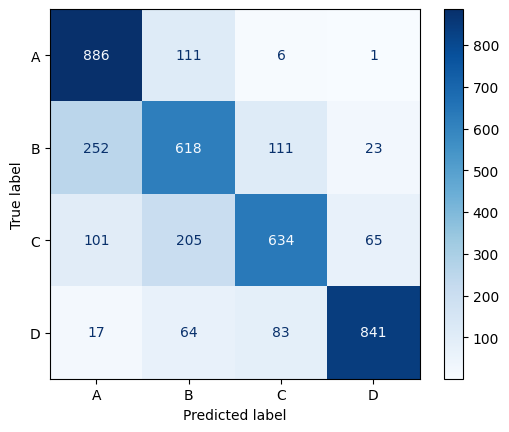

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(
    target_test, target_test_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels) 
disp.plot(cmap='Blues')

In [25]:
print(classification_report(target_test, target_test_pred, target_names=display_labels))

              precision    recall  f1-score   support

           A       0.71      0.88      0.78      1004
           B       0.62      0.62      0.62      1004
           C       0.76      0.63      0.69      1005
           D       0.90      0.84      0.87      1005

    accuracy                           0.74      4018
   macro avg       0.75      0.74      0.74      4018
weighted avg       0.75      0.74      0.74      4018



<p><font color='black' size="5">
Real vs Predict
</font></p>

In [ ]:
print("Testlabel: ",  list(target_test.iloc[0,:]))

In [ ]:
print("Pred.-label: ",  list(target_test_pred.iloc[0,:]))

In [27]:
target_test_pred = model.predict_proba(data_test)

array([[1.64213562e-07, 3.32925490e-03, 6.69615508e-01, 3.27055072e-01],
       [3.29986844e-02, 5.24128291e-01, 1.21249999e-03, 4.41660525e-01],
       [1.09371211e-01, 8.12359351e-01, 7.48578642e-02, 3.41157350e-03],
       ...,
       [9.35928785e-01, 6.03070651e-02, 3.26060947e-03, 5.03540796e-04],
       [7.25419389e-01, 2.44104955e-01, 2.55166732e-02, 4.95898209e-03],
       [8.08147914e-01, 1.23238224e-01, 4.12232449e-02, 2.73906180e-02]])

# **5 <font color='orange'>|</font> Deploy**
---